In [1]:
import pandas as pd
import numpy as np
import os
import pickle
import matplotlib.pyplot as plt
from scipy import signal
import pickle
import statistics
from IPython.display import display, HTML

In [115]:
# movietitles   = ['twomen','bridgeville','pockets','overcome','inception','socialnet','oceans11','testretest',
#                'flower','hotel','garden','dreary','homealone','brockovich','starwars']
# movielength   = [245, 221, 188, 63, 228, 259, 250, 83, 180, 185, 203, 143, 234, 231, 255]  # from /Users/ziweizhang/Downloads/HCP7T_online/rawdata/datacompile.py



directory     = '/Users/ziweizhang/Downloads/HCP37T_LL/data/behav/' # change this
with open(directory+'rawdata.pkl', 'rb') as f:
    rawdata = pickle.load(f)

In [116]:
#rawdata

In [213]:
rawdata.keys()

dict_keys(['Engagement', 'Arousal', 'Valence', 'SocialInteraction', 'Focus', 'Curiosity', 'Relatability', 'Importance', 'Surprise', 'Comprehension', 'Boredom'])

## Read surprise data for all clips


In [117]:
surprise = rawdata.get("Surprise")
surprise

{'twomen': array([[10., 10., 10., ...,  0.,  0.,  0.],
        [10., 10., 10., ...,  5.,  5.,  5.],
        [10., 10., 10., ...,  8.,  8.,  8.],
        ...,
        [10., 10., 10., ...,  0.,  0.,  0.],
        [10., 10., 10., ...,  5.,  5.,  5.],
        [10., 10., 10., ...,  0.,  0.,  0.]]),
 'bridgeville': array([[10., 10., 10., ...,  0.,  0.,  0.],
        [10., 10., 10., ...,  4.,  4.,  4.],
        [10., 10., 10., ...,  7.,  7.,  7.],
        ...,
        [10., 10., 10., ...,  0.,  0.,  0.],
        [10., 10., 10., ..., 13., 13., 13.],
        [10., 10., 10., ...,  1.,  1.,  1.]]),
 'pockets': array([[10., 10., 10., ...,  0.,  0.,  0.],
        [10., 10., 10., ...,  2.,  2.,  2.],
        [10., 10., 10., ...,  6.,  6.,  6.],
        ...,
        [10., 10., 10., ...,  0.,  0.,  0.],
        [10., 10., 10., ..., 12., 12., 12.],
        [10., 10., 10., ...,  4.,  4.,  4.]]),
 'overcome': array([[10., 10., 10., ...,  0.,  0.,  0.],
        [10., 10., 10., ...,  3.,  3.,  3.],
       

### Take a look at the length before doing anything

In [118]:
surprise.get("twomen").shape[1]

285000

In [119]:
surprise.get("bridgeville").shape[1]

241000

In [120]:
surprise.get("pockets").shape[1]

208000

In [121]:
surprise.get("overcome").shape[1]

83000

In [122]:
surprise.get("inception").shape[1]

268000

In [123]:
surprise.get("socialnet").shape[1]

279000

In [124]:
surprise.get("oceans11").shape[1]

270000

In [125]:
surprise.get("testretest").shape[1]

103000

In [126]:
surprise.get("flower").shape[1]

220000

In [127]:
surprise.get("hotel").shape[1]

205000

In [128]:
surprise.get("garden").shape[1]

223000

In [129]:
surprise.get("dreary").shape[1]

163000

In [130]:
surprise.get("homealone").shape[1]

274000

In [131]:
surprise.get("brockovich").shape[1]

251000

In [132]:
surprise.get("starwars").shape[1]

275000

# Cut Rest from the end (start if the first video)

## Movie 1

In [133]:
twomen = surprise.get("twomen")[:,range(20000,surprise.get("twomen").shape[1]-20000)]
twomen.shape

(20, 245000)

In [134]:
bridgeville = surprise.get("bridgeville")[:,range(0,surprise.get("bridgeville").shape[1]-20000)]
bridgeville.shape

(20, 221000)

In [135]:
pockets = surprise.get("pockets")[:,range(0,surprise.get("pockets").shape[1]-20000)]
pockets.shape

(20, 188000)

In [136]:
overcome = surprise.get("overcome")[:,range(0,surprise.get("overcome").shape[1]-20000)]
overcome.shape

(20, 63000)

In [137]:
inception = surprise.get("inception")[:,range(20000,surprise.get("inception").shape[1]-20000)]
inception.shape

(20, 228000)

In [138]:
socialnet = surprise.get("socialnet")[:,range(0,surprise.get("socialnet").shape[1]-20000)]
socialnet.shape

(20, 259000)

In [139]:
oceans11 = surprise.get("oceans11")[:,range(0,surprise.get("oceans11").shape[1]-20000)]
oceans11.shape

(20, 250000)

In [140]:
testretest = surprise.get("testretest")[:,range(0,surprise.get("testretest").shape[1]-20000)]
testretest.shape

(20, 83000)

In [141]:
flower = surprise.get("flower")[:,range(20000,surprise.get("flower").shape[1]-20000)]
flower.shape

(20, 180000)

In [142]:
hotel = surprise.get("hotel")[:,range(0,surprise.get("hotel").shape[1]-20000)]
hotel.shape

(20, 185000)

In [143]:
garden = surprise.get("garden")[:,range(0,surprise.get("garden").shape[1]-20000)]
garden.shape

(20, 203000)

In [144]:
dreary = surprise.get("dreary")[:,range(0,surprise.get("dreary").shape[1]-20000)]
dreary.shape

(20, 143000)

In [145]:
homealone = surprise.get("homealone")[:,range(20000,surprise.get("homealone").shape[1]-20000)]
homealone.shape

(20, 234000)

In [146]:
brockovich = surprise.get("brockovich")[:,range(0,surprise.get("brockovich").shape[1]-20000)]
brockovich.shape

(20, 231000)

In [147]:
starwars = surprise.get("starwars")[:,range(0,surprise.get("starwars").shape[1]-20000)]
starwars.shape

(20, 255000)

In [148]:
starwar2_first200 = pd.DataFrame(starwars).iloc[:, range(0,200)] 
starwar2_last200 = pd.DataFrame(starwars).iloc[:, range(len(pd.DataFrame(starwars).columns)-200,len(pd.DataFrame(starwars).columns))]
# display(HTML(starwar2_first200.to_html()))
# display(HTML(starwar2_last200.to_html()))


## Start plotting surprise time course for each movie

In [149]:
def norm_matrix_clips(clips_data):
    # make sure clips_data is a list of arrays for all CLIPS (not measures list for one clip)
    x_labels = ['twomen', 'bridgeville', 'pockets', 'overcome', 'inception', 'socialnet', 'oceans11', 'testretest', 'flower', 'hotel', 'garden', 'dreary', 'homealone', 'brockovich', 'starwars']
    for i,z_score in enumerate(clips_data):
        plt.matshow(z_score)
        plt.colorbar()
        plt.title(f"{x_labels[i].title()}: Continuous Responses (z-scored within subj)")
        plt.xlabel("Time")
        plt.ylabel("Subject")
        plt.show()

### Step 1: z-score surprise ratings within participant

In [150]:
starwars_z = pd.DataFrame(starwars).apply(lambda row: (row - row.mean()) / row.std(), axis=1)
starwars_z

,0,1,2,3,4,5,6,7,8,9,...,254990,254991,254992,254993,254994,254995,254996,254997,254998,254999
0,2.031712,2.031712,2.031712,2.031712,2.031712,2.031712,2.031712,2.031712,2.031712,2.031712,...,-0.690190,-0.690190,-0.690190,-0.690190,-0.690190,-0.690190,-0.690190,-0.690190,-0.690190,-0.690190
1,-3.843353,-3.843353,-3.843353,-3.843353,-3.843353,-3.843353,-3.843353,-3.843353,-3.843353,-3.843353,...,-0.305350,-0.305350,-0.305350,-0.305350,-0.305350,-0.305350,-0.305350,-0.305350,-0.305350,-0.305350
2,-0.533704,-0.533704,-0.533704,-0.533704,-0.533704,-0.533704,-0.533704,-0.533704,-0.533704,-0.533704,...,-1.244348,-1.244348,-1.244348,-1.244348,-1.244348,-1.244348,-1.244348,-1.244348,-1.244348,-1.244348
3,-1.853014,-1.853014,-1.853014,-1.853014,-1.853014,-1.853014,-1.853014,-1.853014,-1.853014,-1.853014,...,0.717825,0.717825,0.717825,0.717825,0.717825,0.717825,0.717825,0.717825,0.717825,0.717825
4,-1.641421,-1.641421,-1.641421,-1.641421,-1.641421,-1.641421,-1.641421,-1.641421,-1.641421,-1.641421,...,-0.612857,-0.612857,-0.612857,-0.612857,-0.612857,-0.612857,-0.612857,-0.612857,-0.612857,-0.612857
5,-1.279026,-1.279026,-1.279026,-1.279026,-1.279026,-1.279026,-1.279026,-1.279026,-1.279026,-1.279026,...,-0.294714,-0.294714,-0.294714,-0.294714,-0.294714,-0.294714,-0.294714,-0.294714,-0.294714,-0.294714
6,-3.573738,-3.573738,-3.573738,-3.573738,-3.573738,-3.573738,-3.573738,-3.573738,-3.573738,-3.573738,...,0.228757,0.228757,0.228757,0.228757,0.228757,0.228757,0.228757,0.228757,0.228757,0.228757
7,-0.379694,-0.379694,-0.379694,-0.379694,-0.379694,-0.379694,-0.379694,-0.379694,-0.379694,-0.379694,...,1.260550,1.260550,1.260550,1.260550,1.260550,1.260550,1.260550,1.260550,1.260550,1.260550
8,-0.056272,-0.056272,-0.056272,-0.056272,-0.056272,-0.056272,-0.056272,-0.056272,-0.056272,-0.056272,...,-1.372946,-1.372946,-1.372946,-1.372946,-1.372946,-1.372946,-1.372946,-1.372946,-1.372946,-1.372946
9,0.266183,0.266183,0.266183,0.266183,0.266183,0.266183,0.266183,0.266183,0.266183,0.266183,...,-1.807898,-1.807898,-1.807898,-1.807898,-1.807898,-1.807898,-1.807898,-1.807898,-1.807898,-1.807898


In [151]:
twomen_z = pd.DataFrame(twomen).apply(lambda row: (row - row.mean()) / row.std(), axis=1)
bridgeville_z = pd.DataFrame(bridgeville).apply(lambda row: (row - row.mean()) / row.std(), axis=1)
pockets_z = pd.DataFrame(pockets).apply(lambda row: (row - row.mean()) / row.std(), axis=1)
overcome_z = pd.DataFrame(overcome).apply(lambda row: (row - row.mean()) / row.std(), axis=1)
inception_z = pd.DataFrame(inception).apply(lambda row: (row - row.mean()) / row.std(), axis=1)
socialnet_z = pd.DataFrame(socialnet).apply(lambda row: (row - row.mean()) / row.std(), axis=1)
oceans11_z = pd.DataFrame(oceans11).apply(lambda row: (row - row.mean()) / row.std(), axis=1)
testretest_z = pd.DataFrame(testretest).apply(lambda row: (row - row.mean()) / row.std(), axis=1)
flower_z = pd.DataFrame(flower).apply(lambda row: (row - row.mean()) / row.std(), axis=1)
hotel_z = pd.DataFrame(hotel).apply(lambda row: (row - row.mean()) / row.std(), axis=1)
garden_z = pd.DataFrame(garden).apply(lambda row: (row - row.mean()) / row.std(), axis=1)
dreary_z = pd.DataFrame(dreary).apply(lambda row: (row - row.mean()) / row.std(), axis=1)
homealone_z = pd.DataFrame(homealone).apply(lambda row: (row - row.mean()) / row.std(), axis=1)
brockovich_z = pd.DataFrame(brockovich).apply(lambda row: (row - row.mean()) / row.std(), axis=1)

In [152]:
starwars_z.iloc[0]

0         2.031712
1         2.031712
2         2.031712
3         2.031712
4         2.031712
            ...   
254995   -0.690190
254996   -0.690190
254997   -0.690190
254998   -0.690190
254999   -0.690190
Name: 0, Length: 255000, dtype: float64

<AxesSubplot: >

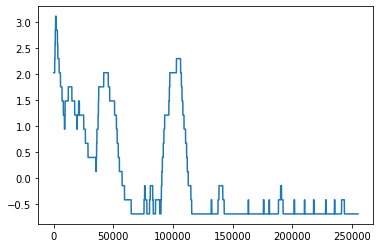

In [153]:
starwars_z.iloc[0].plot.line()
# plt.colorbar()
# plt.title(f"{x_labels[i].title()}: Continuous Responses (z-scored within subj)")
# plt.xlabel("Time")
# plt.ylabel("Subject")
# plt.show()

Text(0.5, 1.0, 'z-scored within twomen')

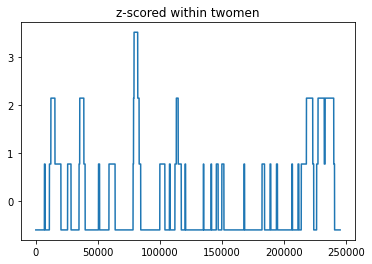

In [154]:
twomen_z.iloc[0].plot.line()
plt.title("z-scored within twomen")


Text(0.5, 1.0, 'z-scored within bridgeville')

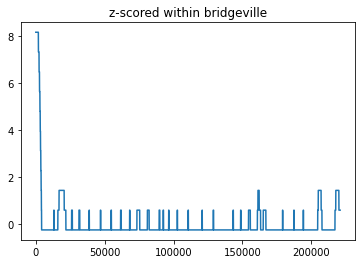

In [155]:
bridgeville_z.iloc[0].plot.line()
plt.title("z-scored within bridgeville")


Text(0.5, 1.0, 'z-scored within pockets')

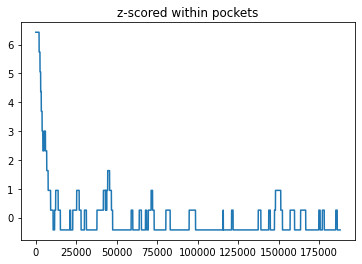

In [156]:
pockets_z.iloc[0].plot.line()
plt.title("z-scored within pockets")


Text(0.5, 1.0, 'z-scored within overcome')

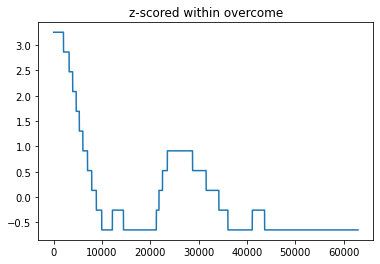

In [157]:
overcome_z.iloc[0].plot.line()
plt.title("z-scored within overcome")



Text(0.5, 1.0, 'z-scored within inception')

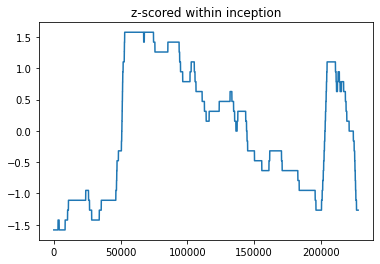

In [158]:
inception_z.iloc[0].plot.line()
plt.title("z-scored within inception")



Text(0.5, 1.0, 'z-scored within socialnet')

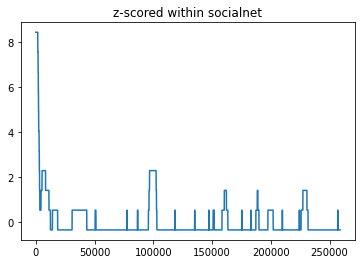

In [159]:
socialnet_z.iloc[0].plot.line()
plt.title("z-scored within socialnet")



Text(0.5, 1.0, 'z-scored within oceans11')

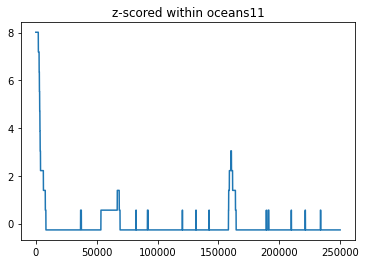

In [160]:
oceans11_z.iloc[0].plot.line()
plt.title("z-scored within oceans11")



Text(0.5, 1.0, 'z-scored within testretest')

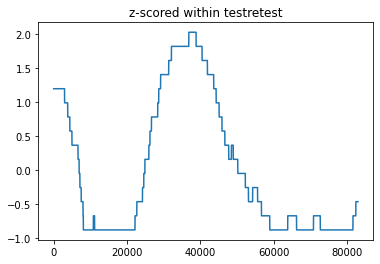

In [161]:
testretest_z.iloc[0].plot.line()
plt.title("z-scored within testretest")



Text(0.5, 1.0, 'z-scored within flower')

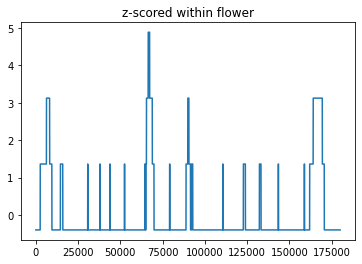

In [162]:
flower_z.iloc[0].plot.line()
plt.title("z-scored within flower")



Text(0.5, 1.0, 'z-scored within hotel')

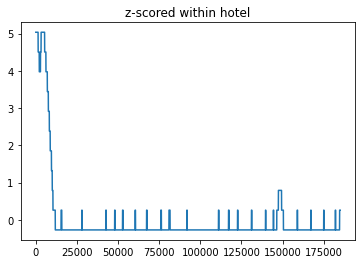

In [163]:
hotel_z.iloc[0].plot.line()
plt.title("z-scored within hotel")



Text(0.5, 1.0, 'z-scored within garden')

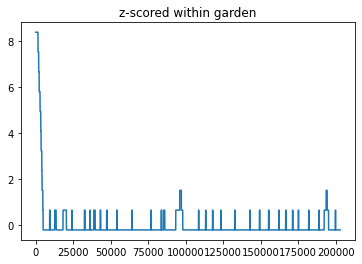

In [164]:
garden_z.iloc[0].plot.line()
plt.title("z-scored within garden")



Text(0.5, 1.0, 'z-scored within dreary')

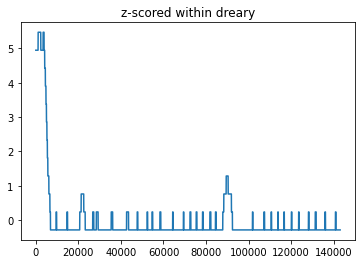

In [165]:
dreary_z.iloc[0].plot.line()
plt.title("z-scored within dreary")



Text(0.5, 1.0, 'z-scored within homealone')

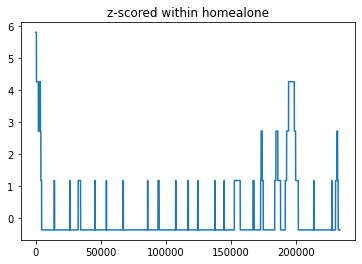

In [166]:
homealone_z.iloc[0].plot.line()
plt.title("z-scored within homealone")



Text(0.5, 1.0, 'z-scored within brockovich')

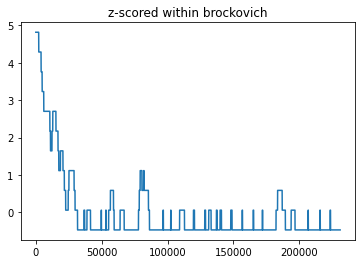

In [167]:
brockovich_z.iloc[0].plot.line()
plt.title("z-scored within brockovich")

### Step 2: averge the z-score surprise ratings across participants to get group average

This is the final time course we need

In [168]:
starwars_z_mean = starwars_z.mean(axis=0)

starwars_z_mean

0        -1.150257
1        -1.150257
2        -1.150257
3        -1.150257
4        -1.150257
            ...   
254995   -0.642397
254996   -0.642397
254997   -0.642397
254998   -0.642397
254999   -0.642397
Length: 255000, dtype: float64

In [169]:
twomen_z_mean = twomen_z.mean(axis=0)
bridgeville_z_mean = bridgeville_z.mean(axis=0)
pockets_z_mean = pockets_z.mean(axis=0)
overcome_z_mean = overcome_z.mean(axis=0)
inception_z_mean = inception_z.mean(axis=0)
socialnet_z_mean = socialnet_z.mean(axis=0)
oceans11_z_mean = oceans11_z.mean(axis=0)
testretest_z_mean = testretest_z.mean(axis=0)
flower_z_mean = flower_z.mean(axis=0)
hotel_z_mean = hotel_z.mean(axis=0)
garden_z_mean = garden_z.mean(axis=0)
dreary_z_mean = dreary_z.mean(axis=0)
homealone_z_mean = homealone_z.mean(axis=0)
brockovich_z_mean = brockovich_z.mean(axis=0)

### Plot the mean of each clip

In [170]:
twomen_z_mean


0        -1.488441
1        -1.488441
2        -1.488441
3        -1.488441
4        -1.488441
            ...   
244995   -1.176156
244996   -1.176156
244997   -1.176156
244998   -1.176156
244999   -1.176156
Length: 245000, dtype: float64

Text(0.5, 1.0, 'z-scored within subject, group mean, inception')

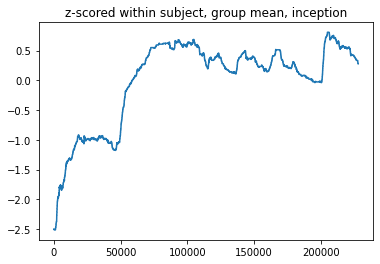

In [171]:
inception_z_mean.plot.line()
plt.title("z-scored within subject, group mean, inception")

Text(0.5, 1.0, 'z-scored within subject, group mean, twomen')

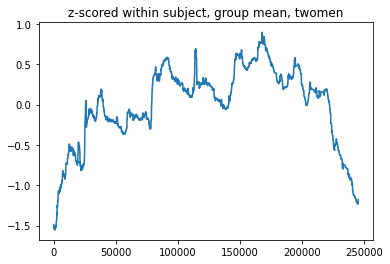

In [172]:
twomen_z_mean.plot.line()
plt.title("z-scored within subject, group mean, twomen")


Text(0.5, 1.0, 'z-scored within subject, group mean, bridgeville')

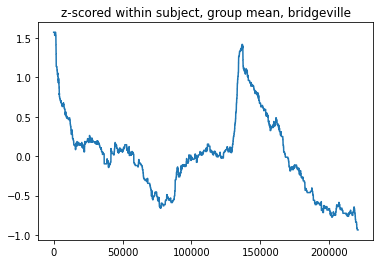

In [173]:
bridgeville_z_mean.plot.line()
plt.title("z-scored within subject, group mean, bridgeville")


Text(0.5, 1.0, 'z-scored within subject, group mean, pockets')

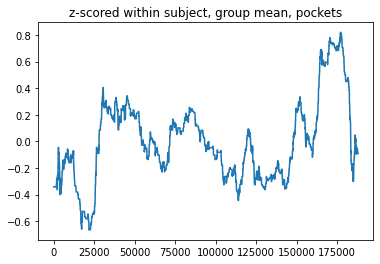

In [174]:
pockets_z_mean.plot.line()
plt.title("z-scored within subject, group mean, pockets")


Text(0.5, 1.0, 'z-scored within subject, group mean, overcome')

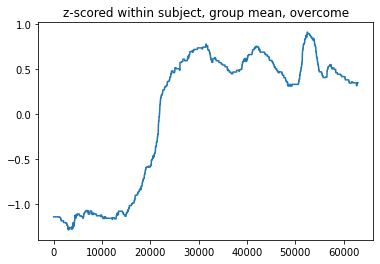

In [175]:
overcome_z_mean.plot.line()
plt.title("z-scored within subject, group mean, overcome")


Text(0.5, 1.0, 'z-scored within subject, group mean, socialnet')

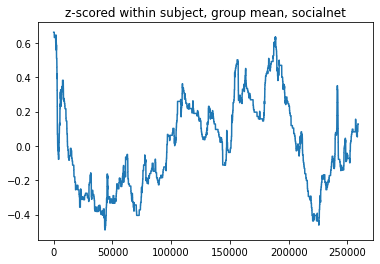

In [176]:
socialnet_z_mean.plot.line()
plt.title("z-scored within subject, group mean, socialnet")


Text(0.5, 1.0, 'z-scored within subject, group mean, oceans11')

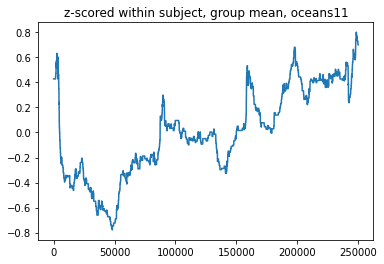

In [177]:
oceans11_z_mean.plot.line()
plt.title("z-scored within subject, group mean, oceans11")


Text(0.5, 1.0, 'z-scored within subject, group mean, testretest')

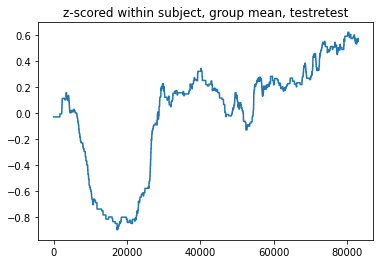

In [178]:
testretest_z_mean.plot.line()
plt.title("z-scored within subject, group mean, testretest")


Text(0.5, 1.0, 'z-scored within subject, group mean, flower')

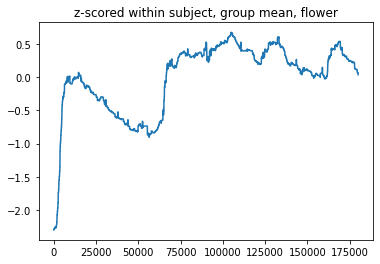

In [179]:
flower_z_mean.plot.line()
plt.title("z-scored within subject, group mean, flower")


Text(0.5, 1.0, 'z-scored within subject, group mean, hotel')

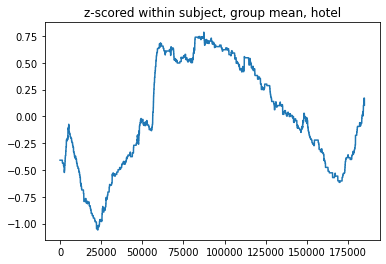

In [180]:
hotel_z_mean.plot.line()
plt.title("z-scored within subject, group mean, hotel")


Text(0.5, 1.0, 'z-scored within subject, group mean, garden')

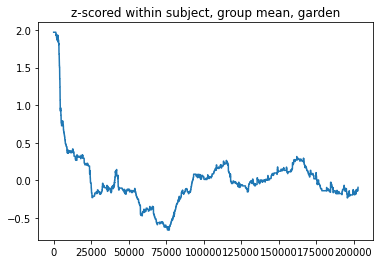

In [181]:
garden_z_mean.plot.line()
plt.title("z-scored within subject, group mean, garden")


Text(0.5, 1.0, 'z-scored within subject, group mean, dreary')

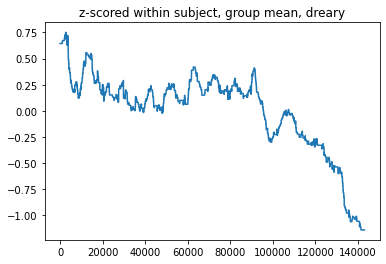

In [182]:
dreary_z_mean.plot.line()
plt.title("z-scored within subject, group mean, dreary")


Text(0.5, 1.0, 'z-scored within subject, group mean, homealone')

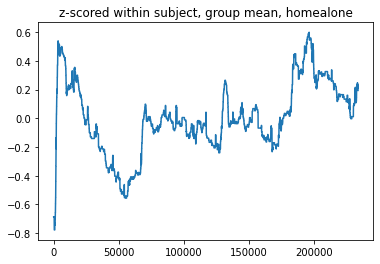

In [183]:
homealone_z_mean.plot.line()
plt.title("z-scored within subject, group mean, homealone")


Text(0.5, 1.0, 'z-scored within subject, group mean, brockovich')

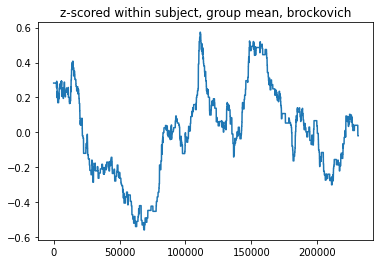

In [184]:
brockovich_z_mean.plot.line()
plt.title("z-scored within subject, group mean, brockovich")


Text(0.5, 1.0, 'z-scored within subject, group mean, starwars')

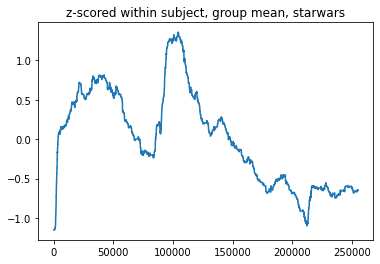

In [185]:
starwars_z_mean.plot.line()
plt.title("z-scored within subject, group mean, starwars")

## Sample behavioral ratings to match brain data (TR=1000ms)

Calculate the mean of the mean z-scored group level surprise rating in every 1000ms window
link to paper with movie clip description: https://www.sciencedirect.com/science/article/pii/S1053811921002408#sec0002


In [186]:
starwars_z_mean.shape

(255000,)

Text(0.5, 1.0, '1000ms windows mean, z-scored within subject, group mean, starwars')

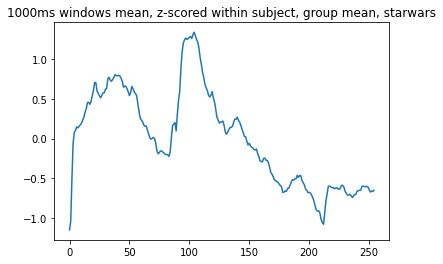

In [187]:
starwars_data = np.array(starwars_z_mean) # Step 1: Convert to numpy array

# Step 2: Reshape to 1000 columns, each representing 1ms in the 1000ms window.
reshaped_starwars_z_mean = starwars_data.reshape(-1, 1000) # This creates 255 rows by 1000 columns

# Step 3: Calculate the mean for each 1000ms window (i.e., along the columns)
mean_starwars_z_mean = reshaped_starwars_z_mean.mean(axis=1)
# Now, 'mean_satrwars_z_mean' is a numpy array with the mean for each 1000ms window.

plt.plot(mean_starwars_z_mean) 
plt.title("1000ms windows mean, z-scored within subject, group mean, starwars")

length (245,)


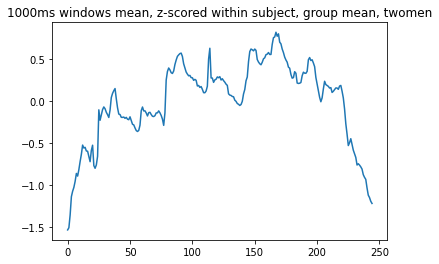

In [188]:
twomen_data = np.array(twomen_z_mean) # Step 1: Convert to numpy array

# Step 2: Reshape to 1000 columns, each representing 1ms in the 1000ms window.
reshaped_twomen_z_mean = twomen_data.reshape(-1, 1000) # This creates 255 rows by 1000 columns

# Step 3: Calculate the mean for each 1000ms window (i.e., along the columns)
mean_twomen_z_mean = reshaped_twomen_z_mean.mean(axis=1)
# Now, 'mean_twomen_z_mean' is a numpy array with the mean for each 1000ms window.

plt.plot(mean_twomen_z_mean) 
plt.title("1000ms windows mean, z-scored within subject, group mean, twomen")
print('length', np.shape(mean_twomen_z_mean))

length (221,)


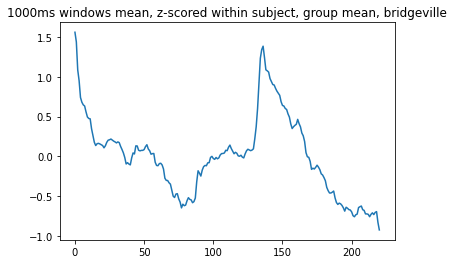

In [189]:
bridgeville_data = np.array(bridgeville_z_mean) # Step 1: Convert to numpy array

# Step 2: Reshape to 1000 columns, each representing 1ms in the 1000ms window.
reshaped_bridgeville_z_mean = bridgeville_data.reshape(-1, 1000) # This creates 255 rows by 1000 columns

# Step 3: Calculate the mean for each 1000ms window (i.e., along the columns)
mean_bridgeville_z_mean = reshaped_bridgeville_z_mean.mean(axis=1)
# Now, 'mean_bridgeville_z_mean' is a numpy array with the mean for each 1000ms window.

plt.plot(mean_bridgeville_z_mean) 
plt.title("1000ms windows mean, z-scored within subject, group mean, bridgeville")
print('length', np.shape(mean_bridgeville_z_mean))

length (188,)


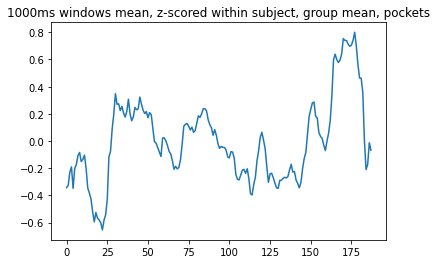

In [190]:
pockets_data = np.array(pockets_z_mean) # Step 1: Convert to numpy array

# Step 2: Reshape to 1000 columns, each representing 1ms in the 1000ms window.
reshaped_pockets_z_mean = pockets_data.reshape(-1, 1000) # This creates 255 rows by 1000 columns

# Step 3: Calculate the mean for each 1000ms window (i.e., along the columns)
mean_pockets_z_mean = reshaped_pockets_z_mean.mean(axis=1)
# Now, 'mean_pockets_z_mean' is a numpy array with the mean for each 1000ms window.

plt.plot(mean_pockets_z_mean) 
plt.title("1000ms windows mean, z-scored within subject, group mean, pockets")
print('length', np.shape(mean_pockets_z_mean))

length (63,)


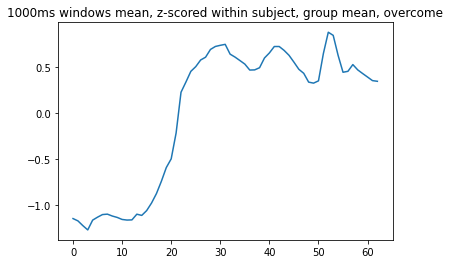

In [191]:
overcome_data = np.array(overcome_z_mean) # Step 1: Convert to numpy array

# Step 2: Reshape to 1000 columns, each representing 1ms in the 1000ms window.
reshaped_overcome_z_mean = overcome_data.reshape(-1, 1000) # This creates 255 rows by 1000 columns

# Step 3: Calculate the mean for each 1000ms window (i.e., along the columns)
mean_overcome_z_mean = reshaped_overcome_z_mean.mean(axis=1)
# Now, 'mean_overcome_z_mean' is a numpy array with the mean for each 1000ms window.

plt.plot(mean_overcome_z_mean) 
plt.title("1000ms windows mean, z-scored within subject, group mean, overcome")
print('length', np.shape(mean_overcome_z_mean))

length (228,)


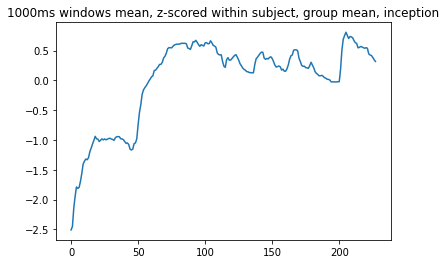

In [192]:
inception_data = np.array(inception_z_mean) # Step 1: Convert to numpy array

# Step 2: Reshape to 1000 columns, each representing 1ms in the 1000ms window.
reshaped_inception_z_mean = inception_data.reshape(-1, 1000) # This creates 255 rows by 1000 columns

# Step 3: Calculate the mean for each 1000ms window (i.e., along the columns)
mean_inception_z_mean = reshaped_inception_z_mean.mean(axis=1)
# Now, 'mean_inception_z_mean' is a numpy array with the mean for each 1000ms window.

plt.plot(mean_inception_z_mean) 
plt.title("1000ms windows mean, z-scored within subject, group mean, inception")
print('length', np.shape(mean_inception_z_mean))

length (259,)


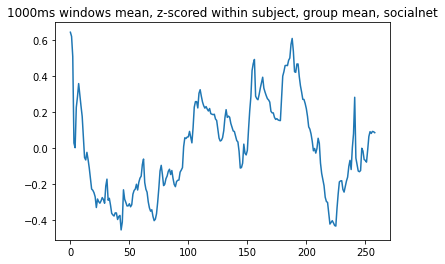

In [193]:
socialnet_data = np.array(socialnet_z_mean) # Step 1: Convert to numpy array

# Step 2: Reshape to 1000 columns, each representing 1ms in the 1000ms window.
reshaped_socialnet_z_mean = socialnet_data.reshape(-1, 1000) # This creates 255 rows by 1000 columns

# Step 3: Calculate the mean for each 1000ms window (i.e., along the columns)
mean_socialnet_z_mean = reshaped_socialnet_z_mean.mean(axis=1)
# Now, 'mean_socialnet_z_mean' is a numpy array with the mean for each 1000ms window.

plt.plot(mean_socialnet_z_mean) 
plt.title("1000ms windows mean, z-scored within subject, group mean, socialnet")
print('length', np.shape(mean_socialnet_z_mean))

length (250,)


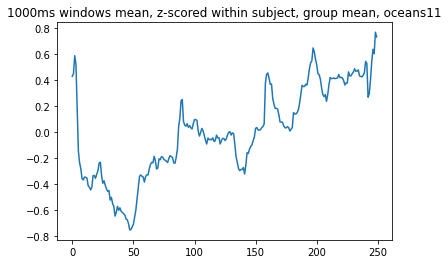

In [194]:
oceans11_data = np.array(oceans11_z_mean) # Step 1: Convert to numpy array

# Step 2: Reshape to 1000 columns, each representing 1ms in the 1000ms window.
reshaped_oceans11_z_mean = oceans11_data.reshape(-1, 1000) # This creates 255 rows by 1000 columns

# Step 3: Calculate the mean for each 1000ms window (i.e., along the columns)
mean_oceans11_z_mean = reshaped_oceans11_z_mean.mean(axis=1)
# Now, 'mean_oceans11_z_mean' is a numpy array with the mean for each 1000ms window.

plt.plot(mean_oceans11_z_mean) 
plt.title("1000ms windows mean, z-scored within subject, group mean, oceans11")
print('length', np.shape(mean_oceans11_z_mean))

length (83,)


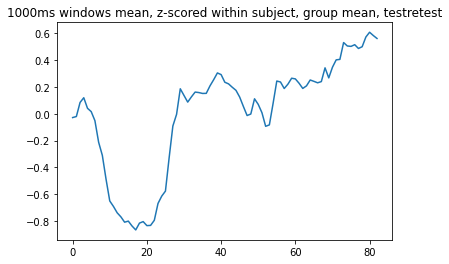

In [195]:
testretest_data = np.array(testretest_z_mean) # Step 1: Convert to numpy array

# Step 2: Reshape to 1000 columns, each representing 1ms in the 1000ms window.
reshaped_testretest_z_mean = testretest_data.reshape(-1, 1000) # This creates 255 rows by 1000 columns

# Step 3: Calculate the mean for each 1000ms window (i.e., along the columns)
mean_testretest_z_mean = reshaped_testretest_z_mean.mean(axis=1)
# Now, 'mean_testretest_z_mean' is a numpy array with the mean for each 1000ms window.

plt.plot(mean_testretest_z_mean) 
plt.title("1000ms windows mean, z-scored within subject, group mean, testretest")
print('length', np.shape(mean_testretest_z_mean))

length (180,)


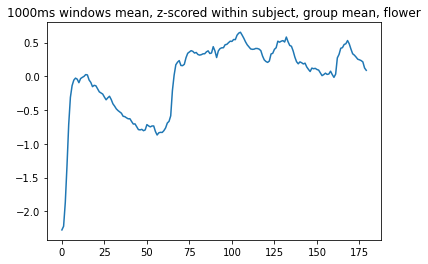

In [196]:
flower_data = np.array(flower_z_mean) # Step 1: Convert to numpy array

# Step 2: Reshape to 1000 columns, each representing 1ms in the 1000ms window.
reshaped_flower_z_mean = flower_data.reshape(-1, 1000) # This creates 255 rows by 1000 columns

# Step 3: Calculate the mean for each 1000ms window (i.e., along the columns)
mean_flower_z_mean = reshaped_flower_z_mean.mean(axis=1)
# Now, 'mean_flower_z_mean' is a numpy array with the mean for each 1000ms window.

plt.plot(mean_flower_z_mean) 
plt.title("1000ms windows mean, z-scored within subject, group mean, flower")
print('length', np.shape(mean_flower_z_mean))

length (185,)


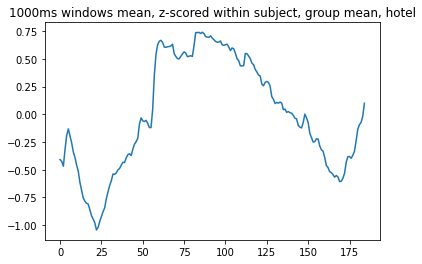

In [197]:
hotel_data = np.array(hotel_z_mean) # Step 1: Convert to numpy array

# Step 2: Reshape to 1000 columns, each representing 1ms in the 1000ms window.
reshaped_hotel_z_mean = hotel_data.reshape(-1, 1000) # This creates 255 rows by 1000 columns

# Step 3: Calculate the mean for each 1000ms window (i.e., along the columns)
mean_hotel_z_mean = reshaped_hotel_z_mean.mean(axis=1)
# Now, 'mean_hotel_z_mean' is a numpy array with the mean for each 1000ms window.

plt.plot(mean_hotel_z_mean) 
plt.title("1000ms windows mean, z-scored within subject, group mean, hotel")
print('length', np.shape(mean_hotel_z_mean))

length (203,)


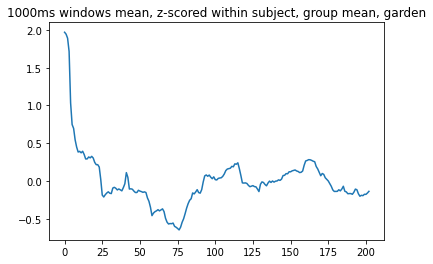

In [198]:
garden_data = np.array(garden_z_mean) # Step 1: Convert to numpy array

# Step 2: Reshape to 1000 columns, each representing 1ms in the 1000ms window.
reshaped_garden_z_mean = garden_data.reshape(-1, 1000) # This creates 255 rows by 1000 columns

# Step 3: Calculate the mean for each 1000ms window (i.e., along the columns)
mean_garden_z_mean = reshaped_garden_z_mean.mean(axis=1)
# Now, 'mean_garden_z_mean' is a numpy array with the mean for each 1000ms window.

plt.plot(mean_garden_z_mean) 
plt.title("1000ms windows mean, z-scored within subject, group mean, garden")
print('length', np.shape(mean_garden_z_mean))

length (143,)


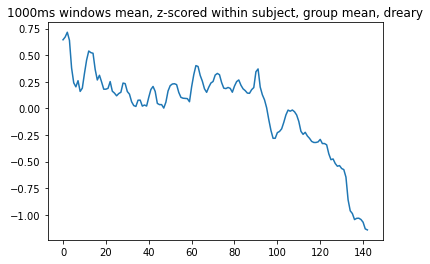

In [199]:
dreary_data = np.array(dreary_z_mean) # Step 1: Convert to numpy array

# Step 2: Reshape to 1000 columns, each representing 1ms in the 1000ms window.
reshaped_dreary_z_mean = dreary_data.reshape(-1, 1000) # This creates 255 rows by 1000 columns

# Step 3: Calculate the mean for each 1000ms window (i.e., along the columns)
mean_dreary_z_mean = reshaped_dreary_z_mean.mean(axis=1)
# Now, 'mean_dreary_z_mean' is a numpy array with the mean for each 1000ms window.

plt.plot(mean_dreary_z_mean) 
plt.title("1000ms windows mean, z-scored within subject, group mean, dreary")
print('length', np.shape(mean_dreary_z_mean))

length (234,)


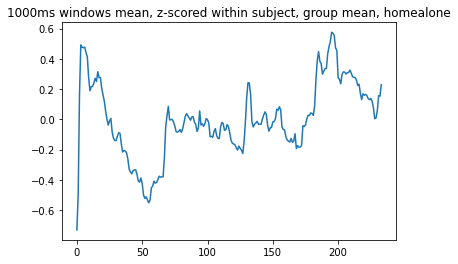

In [200]:
homealone_data = np.array(homealone_z_mean) # Step 1: Convert to numpy array

# Step 2: Reshape to 1000 columns, each representing 1ms in the 1000ms window.
reshaped_homealone_z_mean = homealone_data.reshape(-1, 1000) # This creates 255 rows by 1000 columns

# Step 3: Calculate the mean for each 1000ms window (i.e., along the columns)
mean_homealone_z_mean = reshaped_homealone_z_mean.mean(axis=1)
# Now, 'mean_homealone_z_mean' is a numpy array with the mean for each 1000ms window.

plt.plot(mean_homealone_z_mean) 
plt.title("1000ms windows mean, z-scored within subject, group mean, homealone")
print('length', np.shape(mean_homealone_z_mean))

length (231,)


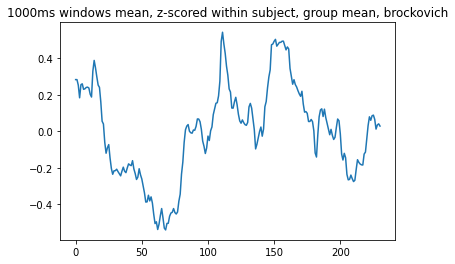

In [201]:
brockovich_data = np.array(brockovich_z_mean) # Step 1: Convert to numpy array

# Step 2: Reshape to 1000 columns, each representing 1ms in the 1000ms window.
reshaped_brockovich_z_mean = brockovich_data.reshape(-1, 1000) # This creates 255 rows by 1000 columns

# Step 3: Calculate the mean for each 1000ms window (i.e., along the columns)
mean_brockovich_z_mean = reshaped_brockovich_z_mean.mean(axis=1)
# Now, 'mean_brockovich_z_mean' is a numpy array with the mean for each 1000ms window.

plt.plot(mean_brockovich_z_mean) 
plt.title("1000ms windows mean, z-scored within subject, group mean, brockovich")
print('length', np.shape(mean_brockovich_z_mean))

## Concatenate all movie clips

In [202]:
movie1_titles = np.concatenate([mean_twomen_z_mean,mean_bridgeville_z_mean,mean_pockets_z_mean,mean_overcome_z_mean])
                 
movie2_titles = np.concatenate([mean_inception_z_mean,mean_socialnet_z_mean,mean_oceans11_z_mean,mean_testretest_z_mean])
                 
movie3_titles = np.concatenate([mean_flower_z_mean,mean_hotel_z_mean,mean_garden_z_mean,mean_dreary_z_mean])

movie4_titles = np.concatenate([mean_homealone_z_mean,mean_brockovich_z_mean,mean_starwars_z_mean])



In [203]:
print(np.shape(movie1_titles),np.shape(movie2_titles),np.shape(movie3_titles),np.shape(movie4_titles))

(717,) (820,) (711,) (720,)


In [204]:
timeinfo_withrest = {}
timeinfo_withrest[1] = [245 +20+20, 221 +20, 188 +20, 63 +20]
timeinfo_withrest[2] = [228 +20+20, 259 +20, 250 +20, 83 +20]
timeinfo_withrest[3] = [180 +20+20, 185 +20, 203 +20, 143 +20]
timeinfo_withrest[4] = [234 +20+20, 231 +20, 255 +20]
print(sum(timeinfo_withrest[1]),sum(timeinfo_withrest[2]),sum(timeinfo_withrest[3]),sum(timeinfo_withrest[4]))

817 920 811 800


In [205]:
timeinfo = {}
timeinfo[1] = [245, 221, 188, 63]
timeinfo[2] = [228, 259, 250, 83]
timeinfo[3] = [180, 185, 203, 143]
timeinfo[4] = [234, 231, 255]
print(sum(timeinfo[1]),sum(timeinfo[2]),sum(timeinfo[3]),sum(timeinfo[4]))

717 820 711 720


In [208]:
pd.DataFrame(movie1_titles).to_csv('/Users/ziweizhang/Downloads/HCP37T_LL/output/behav_ratings/surprise/movie1.csv',index=False)
pd.DataFrame(movie2_titles).to_csv('/Users/ziweizhang/Downloads/HCP37T_LL/output/behav_ratings/surprise/movie2.csv',index=False)
pd.DataFrame(movie3_titles).to_csv('/Users/ziweizhang/Downloads/HCP37T_LL/output/behav_ratings/surprise/movie3.csv',index=False)
pd.DataFrame(movie4_titles).to_csv('/Users/ziweizhang/Downloads/HCP37T_LL/output/behav_ratings/surprise/movie4.csv',index=False)


In [1]:
sum([717,820,711,720])

2968

### quick check on reshape

In [130]:
# Step 1: create random array of size 100
test = np.random.rand(200)
test

array([6.12121229e-01, 2.57816293e-01, 6.88155209e-01, 7.53819781e-01,
       1.35937289e-01, 2.10670204e-01, 4.78052855e-01, 4.35269891e-01,
       3.01731101e-01, 4.70338616e-01, 4.83567556e-01, 5.61003546e-01,
       8.90975656e-01, 4.18693337e-01, 2.58607722e-01, 8.42050067e-01,
       1.07861005e-01, 3.42774585e-01, 1.46648701e-02, 6.60307578e-01,
       8.97215262e-01, 9.18791007e-01, 1.34713528e-02, 1.52716552e-01,
       1.13411225e-01, 2.27844076e-01, 3.18911164e-01, 1.56554789e-01,
       6.89440557e-03, 7.32479099e-02, 6.97878854e-01, 2.70707706e-01,
       8.29906145e-01, 4.23151812e-01, 9.44426251e-01, 1.13358279e-01,
       4.34762725e-01, 6.69128094e-01, 4.41472967e-01, 3.80887507e-01,
       6.69942973e-01, 7.90001882e-01, 1.78813672e-01, 6.03382178e-01,
       4.35634254e-01, 1.65519506e-01, 7.80691932e-01, 4.83583537e-01,
       7.43459058e-01, 7.34504906e-01, 7.10764259e-01, 4.33739133e-01,
       5.55649018e-01, 4.50582218e-01, 2.06280461e-01, 5.88168753e-02,
      

In [131]:
test[4]

0.1359372889609599

In [132]:
# Step 2: reshape to 10*10
reshaped_test = test.reshape(-1, 20)
reshaped_test

array([[6.12121229e-01, 2.57816293e-01, 6.88155209e-01, 7.53819781e-01,
        1.35937289e-01, 2.10670204e-01, 4.78052855e-01, 4.35269891e-01,
        3.01731101e-01, 4.70338616e-01, 4.83567556e-01, 5.61003546e-01,
        8.90975656e-01, 4.18693337e-01, 2.58607722e-01, 8.42050067e-01,
        1.07861005e-01, 3.42774585e-01, 1.46648701e-02, 6.60307578e-01],
       [8.97215262e-01, 9.18791007e-01, 1.34713528e-02, 1.52716552e-01,
        1.13411225e-01, 2.27844076e-01, 3.18911164e-01, 1.56554789e-01,
        6.89440557e-03, 7.32479099e-02, 6.97878854e-01, 2.70707706e-01,
        8.29906145e-01, 4.23151812e-01, 9.44426251e-01, 1.13358279e-01,
        4.34762725e-01, 6.69128094e-01, 4.41472967e-01, 3.80887507e-01],
       [6.69942973e-01, 7.90001882e-01, 1.78813672e-01, 6.03382178e-01,
        4.35634254e-01, 1.65519506e-01, 7.80691932e-01, 4.83583537e-01,
        7.43459058e-01, 7.34504906e-01, 7.10764259e-01, 4.33739133e-01,
        5.55649018e-01, 4.50582218e-01, 2.06280461e-01, 5.8816

In [133]:
pd.DataFrame(reshaped_test)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,0.612121,0.257816,0.688155,0.753820,0.135937,0.210670,0.478053,0.435270,0.301731,0.470339,0.483568,0.561004,0.890976,0.418693,0.258608,0.842050,0.107861,0.342775,0.014665,0.660308
1,0.897215,0.918791,0.013471,0.152717,0.113411,0.227844,0.318911,0.156555,0.006894,0.073248,0.697879,0.270708,0.829906,0.423152,0.944426,0.113358,0.434763,0.669128,0.441473,0.380888
2,0.669943,0.790002,0.178814,0.603382,0.435634,0.165520,0.780692,0.483584,0.743459,0.734505,0.710764,0.433739,0.555649,0.450582,0.206280,0.058817,0.586279,0.528966,0.745542,0.715492
3,0.854869,0.276164,0.311166,0.543827,0.952586,0.437069,0.268293,0.294525,0.591048,0.780743,0.197999,0.492443,0.758290,0.805546,0.715119,0.761941,0.161293,0.051826,0.160133,0.638699
4,0.876484,0.888330,0.559823,0.995207,0.841333,0.223785,0.705195,0.547187,0.908726,0.694724,0.347260,0.327344,0.232545,0.332855,0.764788,0.751143,0.894047,0.454487,0.849836,0.687881
5,0.540518,0.786533,0.003443,0.676000,0.786208,0.357698,0.155995,0.481277,0.768117,0.540584,0.253200,0.132558,0.862369,0.871480,0.258340,0.624227,0.134630,0.845623,0.399476,0.315399
6,0.925844,0.552464,0.229481,0.255858,0.395009,0.520897,0.854860,0.365692,0.760501,0.229580,0.540135,0.090240,0.830148,0.738980,0.501708,0.027384,0.393777,0.764027,0.901908,0.330096
7,0.002710,0.745294,0.634284,0.339992,0.494807,0.224693,0.763529,0.974092,0.679595,0.282852,0.854250,0.000445,0.667825,0.372351,0.530063,0.641866,0.747269,0.569820,0.602991,0.661966
8,0.048784,0.441332,0.468795,0.947304,0.250297,0.720502,0.675436,0.479345,0.886248,0.828967,0.785972,0.876072,0.123865,0.513395,0.287833,0.881921,0.135250,0.945669,0.181345,0.633482
9,0.740432,0.471541,0.970728,0.649918,0.933209,0.203920,0.144988,0.153563,0.488370,0.960710,0.615842,0.615259,0.629806,0.595663,0.684869,0.639706,0.559713,0.645707,0.031607,0.152158


In [134]:
# Step 3: take mean across
mean_reshaped_test = reshaped_test.mean(axis=1)
mean_reshaped_test

array([0.44622092, 0.4042369 , 0.52888223, 0.50267881, 0.64414906,
       0.48968374, 0.51042954, 0.53953475, 0.55559073, 0.54438547])

In [135]:
print(reshaped_test[0], np.mean(reshaped_test[0]), np.mean(reshaped_test[0]) == mean_reshaped_test[0])

[0.61212123 0.25781629 0.68815521 0.75381978 0.13593729 0.2106702
 0.47805286 0.43526989 0.3017311  0.47033862 0.48356756 0.56100355
 0.89097566 0.41869334 0.25860772 0.84205007 0.10786101 0.34277458
 0.01466487 0.66030758] 0.4462209195817791 True
